In [1]:
from bs4 import BeautifulSoup
import requests
import json

In [2]:
def write_json(to_json, filename):
    json_object = json.dumps(to_json)

    with open(filename, "w") as outfile:
        outfile.write(json_object)

In [3]:
def getPageSoup(page):
    r       = requests.get(page.replace("\n", ""))
    soup    = BeautifulSoup(r.content, "html.parser")
    return soup

In [4]:
def getEpSoup(ep_number):
    bc_wiki             = "https://blackclover.fandom.com/wiki/"
    bc_wiki_ep_endpoint = bc_wiki + "Episode_" + str(ep_number)
    return getPageSoup(bc_wiki_ep_endpoint)

In [5]:
def recoverSummaryFromSoup(ep_summary_soup, allowed_tags=None):
    ep_summary = ""
    for element in ep_summary_soup:
        ep_summary += element.getText()
    return ep_summary

In [6]:
def process_text(element, tag_count):
    return element

def process_p(element, tag_count):
    text = ""
    for child in element.children:
        text += process_element(child, tag_count)
    return text

def process_a(element, tag_count):
    text = ""
    for child in element.children:
        text += process_element(child, tag_count)
    return text

def process_sup(element, tag_count):
    return ""

def process_br(element, tag_count):
    return ""

def process_i(element, tag_count):
    text = ""
    for child in element.children:
        text += process_element(child, tag_count)
    return text

def default_process(element, tag_count):
    return str(element)

In [7]:
tag_processors = {
    None    : process_text,
    "p"     : process_p,
    "a"     : process_a,
    "sup"   : process_sup,
    "br"    : process_br,
    "i"     : process_i
}

def update_tag_count(tag_name, tag_count):
    if(tag_name in tag_count):
        tag_count[tag_name] += 1
    else:
        tag_count[tag_name] = 1

def process_element(element, tag_count):
    
    update_tag_count(element.name, tag_count)

    if(element.name in tag_processors):
        return tag_processors[element.name](element, tag_count)
    return default_process(element, tag_count)

In [8]:
def getEpSummary(ep_number, soup_tag_count=dict()):
    ep_soup                 = getEpSoup(ep_number)
    ep_summary_title_soup   = ep_soup.select("#Summary").pop().parent
    ep_summary_soup_elem    = ep_summary_title_soup.find_next_sibling()
    ep_summary = ""
    while(ep_summary_soup_elem.name != 'h2'):
        ep_summary += process_element(ep_summary_soup_elem, soup_tag_count)
        ep_summary_soup_elem = ep_summary_soup_elem.find_next_sibling()
    return (ep_summary, soup_tag_count)

In [9]:
def getEpsSummary(start_ep, end_ep):
    soup_tag_count = dict()
    eps_summary = []
    for ep_number in range(start_ep, end_ep+1):
        ep_summary, _ = getEpSummary(ep_number, soup_tag_count)
        eps_summary.append(ep_summary)
    return eps_summary, soup_tag_count

In [10]:
ep_summary, soup_tag_count = getEpSummary(1)
print(ep_summary)
print(soup_tag_count)

In Hage, a priest finds two babies abandoned outside his church. He takes them inside and discovers their names to be Yuno and Asta.
Fifteen years later, Asta proposes to Sister Lily, who refuses repeatedly. Yuno and the other orphans criticize Asta and point out his lack of magic. Asta tries to show off his skills, but Yuno outshines him with his magic.
Later, at the Grimoire Acceptance Ceremony, a pair of nobles criticize the commoners there. Despite Asta not receiving a grimoire while Yuno attains a four-leaf clover one, Asta challenges Yuno to the title of Wizard King, but Yuno ignores him.
After the ceremony, the two nobles ambush Yuno outside the tower, but Yuno overpowers them. All three are then ambushed by Revchi Salik, a former Magic Knight who plans to steal Yuno's grimoire and sell it. Asta comes to Yuno's rescue but fails.
As Revchi breaks Asta's spirit, Yuno calls Asta his rival. Motivated by this acknowledgment, Asta decides to keep fighting, which summons a grimoire fro

In [11]:
ep_summary, soup_tag_count = getEpSummary(68)
print(ep_summary)
print(soup_tag_count)

Noelle Silva wonders where Asta went after she blew him away with her Water Magic. Looking around, she sees a place with highly concentrated mana and sees Asta helping Yami Sukehiro sell his grilled squid, while Sekke Bronzazza and his friends Aphro and Phati help Jack the Ripper sell his meat dishes. Yami and Jack threaten Asta and Sekke to sell some food, but as no customers stop, Sekke complains its understandable considering how scary both captains are. Noelle asks Asta and Sekke what they are doing and both of them explain how Jack and Yami wanted to settle their score and decided a competition on which food stall will sell more and then Asta and Sekke were dragged into it.
Asta sees a purple snake food stall and gets interested, however, Yami stops him and tells him how good his squids are. Yami and Jack blame Asta and Sekke for not selling anything and decide to settle it with their abilities. They start playing Dear or Alive, trying to make the person looking at the direction t

In [12]:
lines = ep_summary.split('\n')
write_json(lines, "1_ep68_summary.json")

In [13]:
ep_summary, soup_tag_count = getEpSummary(161)
print(ep_summary)
print(soup_tag_count)

Yuno Grinberryall recollects his memories with the Golden Dawn squad and how considerate and friendly they had become. In the present, Gaderois Godroc tells Yuno that he has killed half of his comrades and left others barely alive. Gaderois also adds that they should be honored of being beaten by someone strong like him. Yuno uses Spirit Storm but Gaderois blocks and destroys the spell. Gaderois feels excited to face a Spirit Magic user, but also warns Yuno that his Stone Magic has been enhanced with devil power and counterattacks Yuno. Using Spirit's Hushed Dance, Yuno evades Gaderois attacks and also saves his injured comrades. Gaderois feels lucky to meet a Stage Zero mage other than the Magic Knights Captain. Gaderois introduces himself and asks for Yuno's name, but Yuno refuses to give his name and attacks with Crescent Kamaitachi. 
As the fight progress, Yuno asks Gaderois for his reason to fight, to which Gaderois replies that the Dark Triad has come here for the Stage Zero mage

In [14]:
getEpSummary(61)

("Asta, Finral Roulacase, Noelle Silva, and Vanessa Enoteca have Fana surrounded. Above, Fanzell Kruger and Mars lead Ladros towards Asta but realize that he may have his hands full with Fana. Fanzell and Mars fly overhead just as the Salamander sends a fireball towards Asta. Fanzell tells Asta to deflect towards him. Asta does so and Fanzell aims the fireball towards Ladros. It engulfs him and he burns up before falling towards the forest. Fanzell and Mars land in front of Asta. Asta asks Fanzell why he is with Mars since he is the enemy. Fanzell says he will explain everything later but for now he asks Asta to trust Mars. Asta reluctantly agrees. They turn towards Fana and Mars realizes that her flames are similar to his. He gasps as he recognizes Fana.\nMars remembers when he was a child and how Fana used to cheer him up after tough training sessions. He also remembers how he and the other children were told to kill each other and that the winner would be the kingdom's mage warrior.

In [15]:
eps_summary, soup_tag_count = getEpsSummary(1, 163)
print(soup_tag_count)

{'p': 724, None: 6568, 'a': 2884, 'sup': 159, 'br': 43, 'i': 2}


In [16]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7fdc341fd330>,
 [Text(0, 0, 'p'),
  Text(1, 0, ''),
  Text(2, 0, 'a'),
  Text(3, 0, 'sup'),
  Text(4, 0, 'br'),
  Text(5, 0, 'i')])

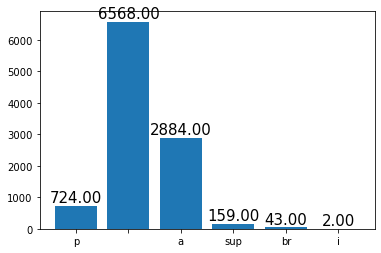

In [17]:
plots = plt.bar(range(len(soup_tag_count)), list(soup_tag_count.values()), data=list(soup_tag_count.values()), align='center')

for bar in plots.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(range(len(soup_tag_count)), list(soup_tag_count.keys()))

(0.0, 50000.0)

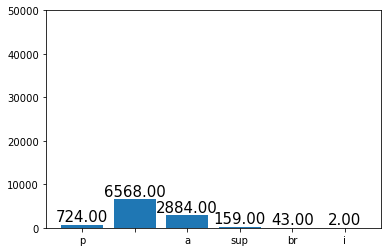

In [18]:
plots = plt.bar(range(len(soup_tag_count)), list(soup_tag_count.values()), data=list(soup_tag_count.values()), align='center')

for bar in plots.patches:
    plt.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(range(len(soup_tag_count)), list(soup_tag_count.keys()))
plt.ylim((0, 50000))

In [19]:
json_object = json.dumps(eps_summary)

with open("1_scrapping_black_clover.json", "w") as outfile:
    outfile.write(json_object)